# Load data and check for missing values and duplicates

In [16]:
import pandas as pd

file_path = '/Users/taief/Desktop/MUSIC REC/data/data_by_artist.csv'
data_by_artist = pd.read_csv(file_path)
data_by_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [17]:
#check for missing values
print(data_by_artist.isnull().sum())
#check for duplicates
duplicates = data_by_artist.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
# check missing rows
missing_rows = data_by_artist.isnull().sum()
print(f"Number of missing rows: {missing_rows.sum()}")

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
Number of duplicate rows: 0
Number of missing rows: 0


# Data Preprocessing

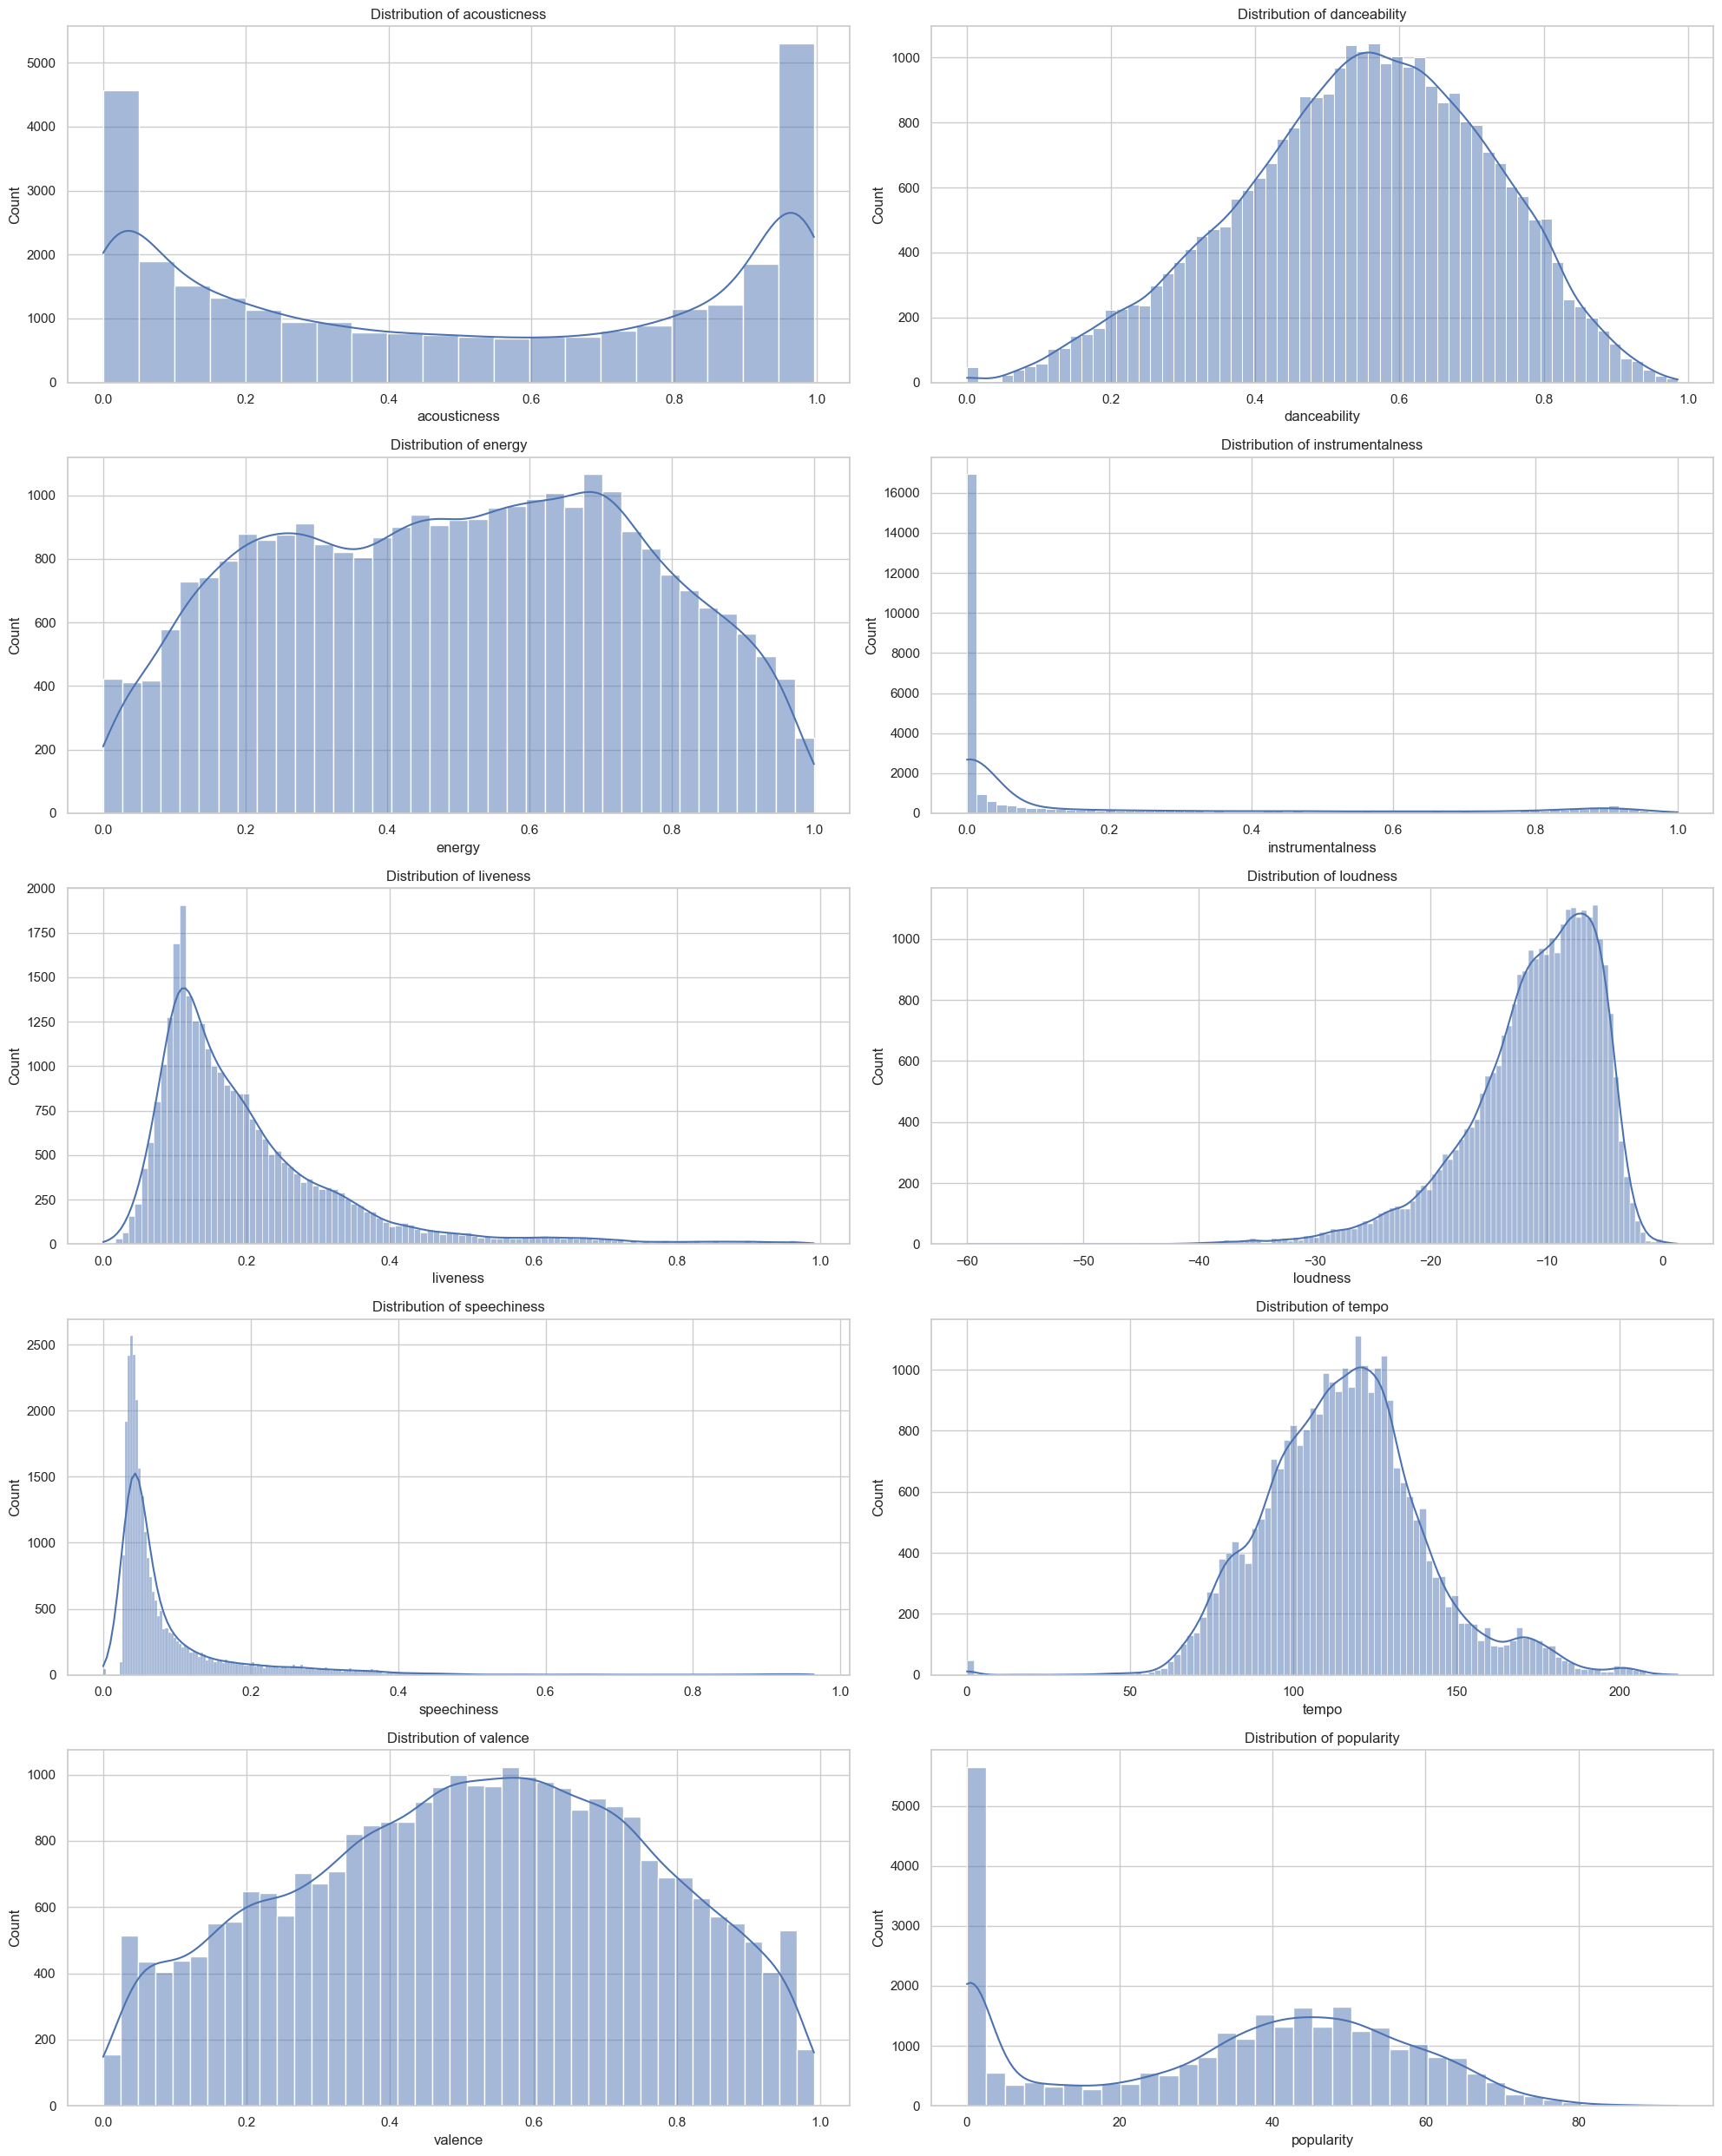

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visual style for plots
sns.set(style="whitegrid")

# List of features to plot
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Plotting distributions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
for i, feature in enumerate(features):
    sns.histplot(data=data_by_artist[feature], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()

# save plot in plot folder with name distribution_of_features.png
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/distribution_of_features_artist.png')

# Descriptive statistics of the data_artist

In [19]:
# Descriptive statistics
descriptive_stats = data_by_artist.describe()
print(descriptive_stats)

               mode         count  acousticness  danceability   duration_ms  \
count  28680.000000  28680.000000  28680.000000  28680.000000  2.868000e+04   
mean       0.759170     13.847211      0.498373      0.546490  2.388780e+05   
std        0.427595     53.372544      0.370614      0.176474  1.211318e+05   
min        0.000000      1.000000      0.000000      0.000000  1.879550e+04   
25%        1.000000      2.000000      0.122296      0.431000  1.823304e+05   
50%        1.000000      3.000000      0.478458      0.557000  2.186400e+05   
75%        1.000000      8.000000      0.896000      0.675000  2.684670e+05   
max        1.000000   3169.000000      0.996000      0.986000  5.403500e+06   

             energy  instrumentalness      liveness      loudness  \
count  28680.000000      28680.000000  28680.000000  28680.000000   
mean       0.497488          0.174756      0.202441    -11.140498   
std        0.254885          0.298406      0.140884      5.771749   
min        0

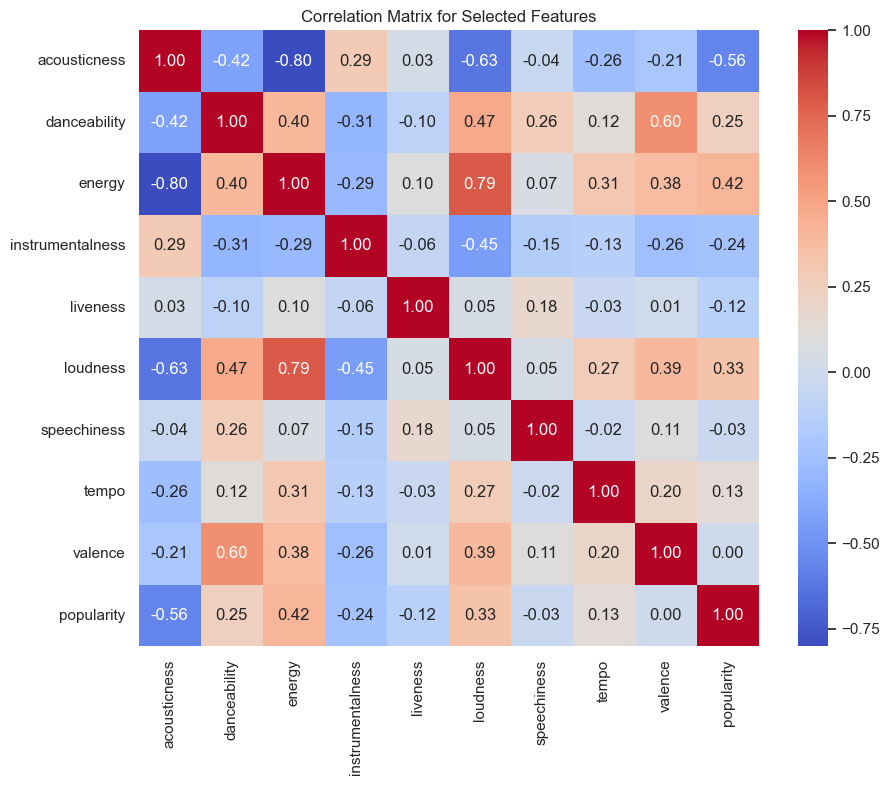

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Select only the specified features from the DataFrame
features_data = data_by_artist[features]

# Compute the correlation matrix
correlation_matrix = features_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


# Standardize the features for K-Means and PCA


In [23]:
from sklearn.preprocessing import StandardScaler

# feature selection for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = data_by_artist[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# PCA

from sklearn.decomposition import PCA

# Keep 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Number of components PCA chose after fitting the data
n_pca_components = X_pca.shape[1]
print(f"PCA optimal {n_pca_components}")


PCA optimal 7


In [27]:
# Apply PCA with 7 components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

For n_clusters = 3, the silhouette score is: 0.21043970452033972
For n_clusters = 4, the silhouette score is: 0.20106250105283183
For n_clusters = 5, the silhouette score is: 0.2073265800104083
For n_clusters = 6, the silhouette score is: 0.21772501711007283
For n_clusters = 7, the silhouette score is: 0.18188612149238187
For n_clusters = 8, the silhouette score is: 0.17593688554312178
For n_clusters = 9, the silhouette score is: 0.1848014826600737
For n_clusters = 10, the silhouette score is: 0.18566604393893812


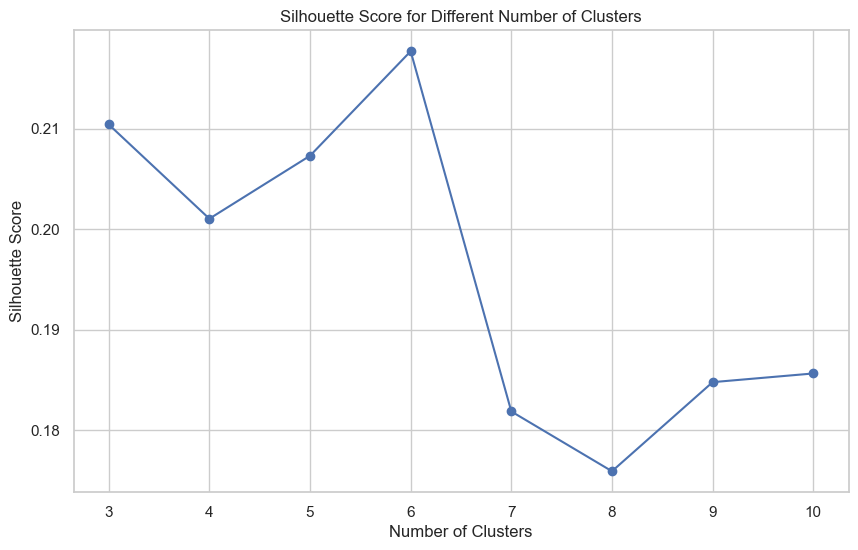

The optimal number of clusters is: 6


In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of possible clusters to evaluate
range_n_clusters = list(range(3, 11))

silhouette_scores = []  # To store silhouette scores for each n_clusters

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)  # Use PCA-reduced data
    
    # Calculate the silhouette score and append to list
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_clusters}")


In [30]:
# KMeans Clustering with 6 clusters

kmeans_optimal = KMeans(n_clusters=6, random_state=10)
optimal_cluster_labels = kmeans_optimal.fit_predict(X_pca)

# Add the cluster labels to your original DataFrame for further analysis
data_by_artist['cluster'] = optimal_cluster_labels


In [32]:
# Inverse transform the centroids back to the original feature space for interpretability
centroids_original_space = scaler.inverse_transform(pca.inverse_transform(kmeans_optimal.cluster_centers_))

# Convert the centroids into a DataFrame for easier analysis
centroids_df = pd.DataFrame(centroids_original_space, columns=features)
print("Cluster centroids (in original feature space):")
print(centroids_df)

# Count the number of artists in each cluster
cluster_counts = data_by_artist['cluster'].value_counts()
print("Number of artists in each cluster:")
print(cluster_counts)


Cluster centroids (in original feature space):
   acousticness  danceability    energy  instrumentalness  liveness  \
0      0.492368      0.546754  0.540799          0.723737  0.173732   
1      0.729557      0.510590  0.347308          0.049234  0.182498   
2      0.488456      0.509014  0.591750          0.117402  0.619470   
3      0.194951      0.642063  0.698327          0.041205  0.173407   
4      0.929533      0.306692  0.138979          0.532660  0.172713   
5      0.611394      0.683890  0.460205          0.044952  0.265517   

    loudness  speechiness       tempo   valence  
0 -12.816226     0.066939  120.632076  0.590627  
1 -12.963777     0.067106  112.873343  0.524217  
2 -10.174129     0.114491  115.870112  0.544574  
3  -6.710526     0.091087  123.511019  0.593188  
4 -19.887636     0.049760   97.779164  0.177763  
5 -11.968084     0.502736  108.711355  0.557602  
Number of artists in each cluster:
cluster
3    11888
1     7739
4     3976
0     2477
2     1484
5     1

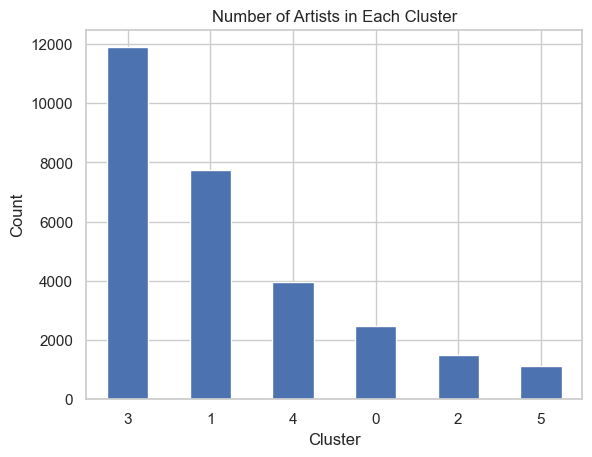

In [33]:
import matplotlib.pyplot as plt

# Plot the number of artists in each cluster
cluster_counts.plot(kind='bar')
plt.title('Number of Artists in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [35]:
from sklearn.preprocessing import normalize

feature_vectors = data_by_artist[features].values
feature_vectors_normalized = normalize(feature_vectors)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(feature_vectors_normalized)

In [40]:
def get_artist_index(artist_name, data):
    # Find the index of the artist in the DataFrame
    return data[data['artists'] == artist_name].index[0]

def recommend_similar_artists(artist_name, data, similarity_matrix, top_n=5):
    artist_index = get_artist_index(artist_name, data)
    similarity_scores = similarity_matrix[artist_index]
    
    # Get indices of top_n most similar artists, excluding the artist itself
    top_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]
    
    # Map indices to artist names
    recommended_artists = data.iloc[top_indices]['artists'].values
    return recommended_artists

# Example usage
artist_name = 'Vancouver Sleep Clinic'  
similar_artists = recommend_similar_artists(artist_name, data_by_artist, similarity_matrix, top_n=5)
print(f"Artists similar to {artist_name}:", similar_artists)


Artists similar to Vancouver Sleep Clinic: ['Yunggoth✰' 'Felix Mendelssohn, adapted by William H. Cummings'
 'Michael Wong' 'Hozier' 'CeCe Winans']
